# Sección 9: Regla de la Cadena y Combinaciones

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, exp, ln, sin, cos, tan, sec, csc, cot, log

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Regla de la Cadena Básica

**Definición**:
Si $y = g(f(x))$, entonces $y' = g'(f(x)) \cdot f'(x)$

### Visualización de la regla de la cadena

=== Ejemplo de Regla de la Cadena ===
Función original: y = (4*x**8 - 6)**6
Derivada usando regla de la cadena: y' = 192*x**7*(4*x**8 - 6)**5


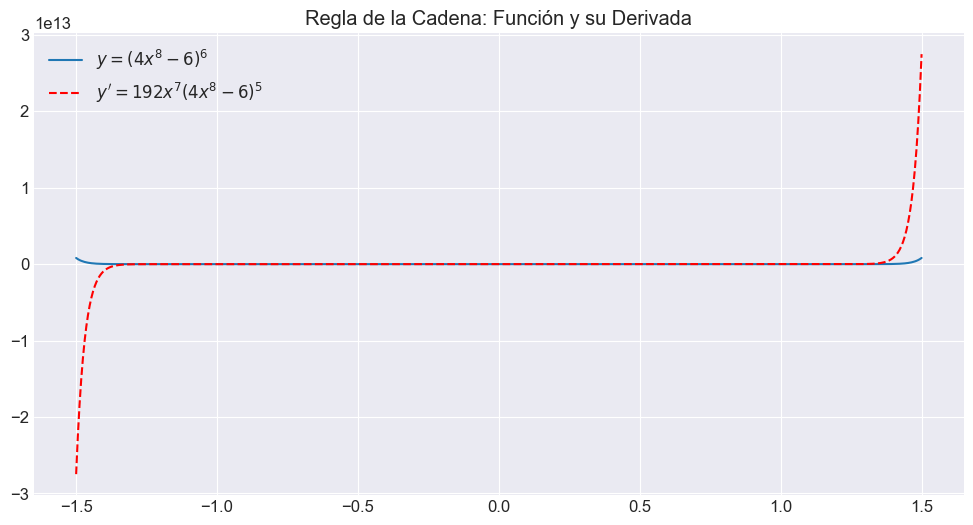

In [6]:
def chain_rule_visualization():
    x = symbols('x')
    
    # Ejemplo del PDF: y = (4x^8 - 6)^6
    f = 4*x**8 - 6  # Función interna
    g = f**6         # Función externa
    
    # Derivadas
    df = diff(f, x)
    dg = diff(g, x)
    
    # Usando regla de la cadena
    chain_derivative = 6*f**5 * df
    
    print("=== Ejemplo de Regla de la Cadena ===")
    print(f"Función original: y = {g}")
    print(f"Derivada usando regla de la cadena: y' = {chain_derivative}")
    
    # Gráfico de la función y su derivada
    x_vals = np.linspace(-1.5, 1.5, 500)
    g_lamb = sp.lambdify(x, g, 'numpy')
    dg_lamb = sp.lambdify(x, dg, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, g_lamb(x_vals), label=f'$y = {sp.latex(g)}$')
    plt.plot(x_vals, dg_lamb(x_vals), 'r--', label=f"$y' = {sp.latex(dg)}$")
    plt.title('Regla de la Cadena: Función y su Derivada')
    plt.legend()
    plt.grid(True)
    plt.show()

chain_rule_visualization()

## 2. Regla de la Cadena con Funciones Trigonométricas

### Implementación de derivadas trigonométricas compuestas

=== Regla de la Cadena con Funciones Trigonométricas ===
1. Función: sin(3*x)
   Derivada teórica: 3*cos(3*x)
   Derivada calculada: 3*cos(3*x)

2. Función: cos(x**2)
   Derivada teórica: -2*x*sin(x**2)
   Derivada calculada: -2*x*sin(x**2)

3. Función: tan(2*x + 1)
   Derivada teórica: 2*sec(2*x + 1)**2
   Derivada calculada: 2*tan(2*x + 1)**2 + 2

4. Función: sec(exp(x))
   Derivada teórica: exp(x)*tan(exp(x))*sec(exp(x))
   Derivada calculada: exp(x)*tan(exp(x))*sec(exp(x))



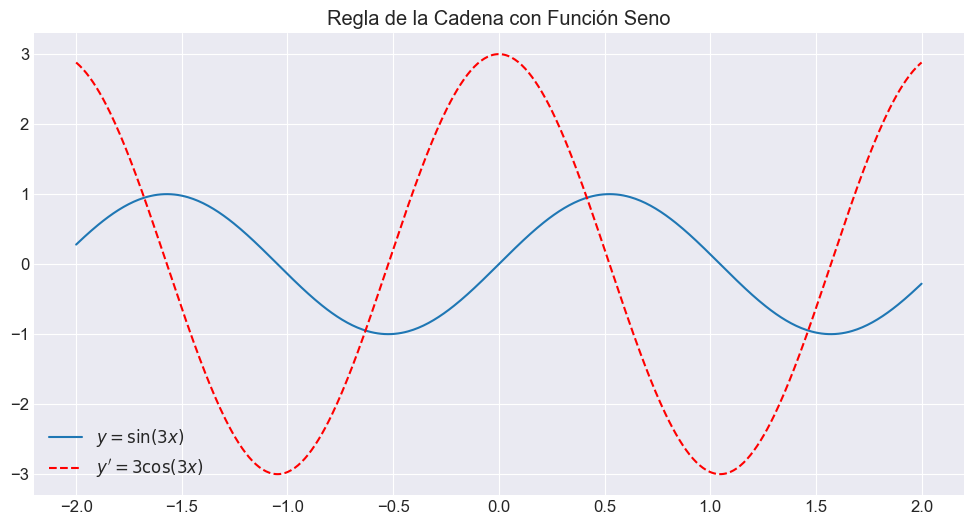

In [10]:
def trig_chain_rule_demo():
    x = symbols('x')
    
    # Tabla de ejemplos trigonométricos
    examples = [
        (sin(3*x), 3*cos(3*x)),
        (cos(x**2), -2*x*sin(x**2)),
        (tan(2*x + 1), 2*sec(2*x + 1)**2),
        (sec(exp(x)), exp(x)*sec(exp(x))*tan(exp(x)))
    ]
    
    print("=== Regla de la Cadena con Funciones Trigonométricas ===")
    for i, (func, deriv) in enumerate(examples):
        calculated = diff(func, x)
        print(f"{i+1}. Función: {func}")
        print(f"   Derivada teórica: {deriv}")
        print(f"   Derivada calculada: {calculated}\n")
    
    # Gráfico de ejemplo
    x_vals = np.linspace(-2, 2, 500)
    func = sin(3*x)
    func_lamb = sp.lambdify(x, func, 'numpy')
    deriv_lamb = sp.lambdify(x, diff(func, x), 'numpy')
    
    plt.figure()
    plt.plot(x_vals, func_lamb(x_vals), label=r'$y = \sin(3x)$')
    plt.plot(x_vals, deriv_lamb(x_vals), 'r--', label=r"$y' = 3\cos(3x)$")
    plt.title('Regla de la Cadena con Función Seno')
    plt.legend()
    plt.grid(True)
    plt.show()

trig_chain_rule_demo()

## 3. Regla de la Cadena con Funciones Exponenciales y Logarítmicas

### Implementación de casos compuestos

=== Regla de la Cadena con Exp/Log ===
1. Función: y = 42**(6*x)
   Derivada: y' = 6*42**(6*x)*log(42)

2. Función: y = log(sqrt(x**3 + x))
   Derivada: y' = (3*x**2/2 + 1/2)/(x**3 + x)

3. Función: y = exp(-x**2)
   Derivada: y' = -2*x*exp(-x**2)



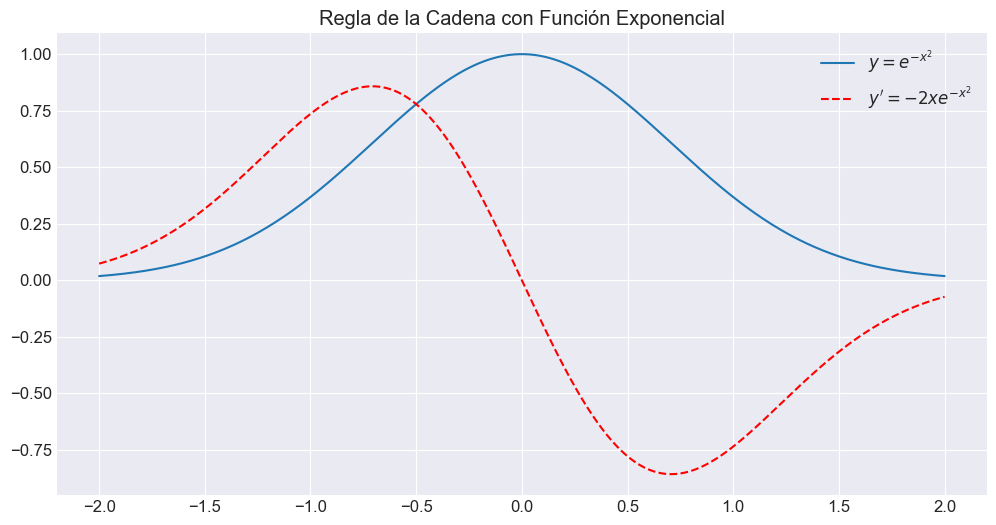

In [11]:
def exp_log_chain_rule():
    x = symbols('x')
    
    # Ejemplos del PDF
    examples = [
        42**(6*x),
        (ln(sp.sqrt(x**3 + x))),
        (exp(-x**2))
    ]
    
    print("=== Regla de la Cadena con Exp/Log ===")
    for i, func in enumerate(examples):
        deriv = diff(func, x)
        print(f"{i+1}. Función: y = {func}")
        print(f"   Derivada: y' = {deriv}\n")
    
    # Gráfico de ejemplo exponencial
    x_vals = np.linspace(-2, 2, 500)
    func = exp(-x**2)
    func_lamb = sp.lambdify(x, func, 'numpy')
    deriv_lamb = sp.lambdify(x, diff(func, x), 'numpy')
    
    plt.figure()
    plt.plot(x_vals, func_lamb(x_vals), label='$y = e^{-x^2}$')
    plt.plot(x_vals, deriv_lamb(x_vals), 'r--', label="$y' = -2xe^{-x^2}$")
    plt.title('Regla de la Cadena con Función Exponencial')
    plt.legend()
    plt.grid(True)
    plt.show()

exp_log_chain_rule()

## 4. Combinación con Regla del Producto

**Caso especial**: Cuando tenemos productos de funciones compuestas

=== Combinación Producto y Cadena ===
Función original: y = 9*x**4*(x**2 + 1)**7
Derivada calculada: y' = 126*x**5*(x**2 + 1)**6 + 36*x**3*(x**2 + 1)**7


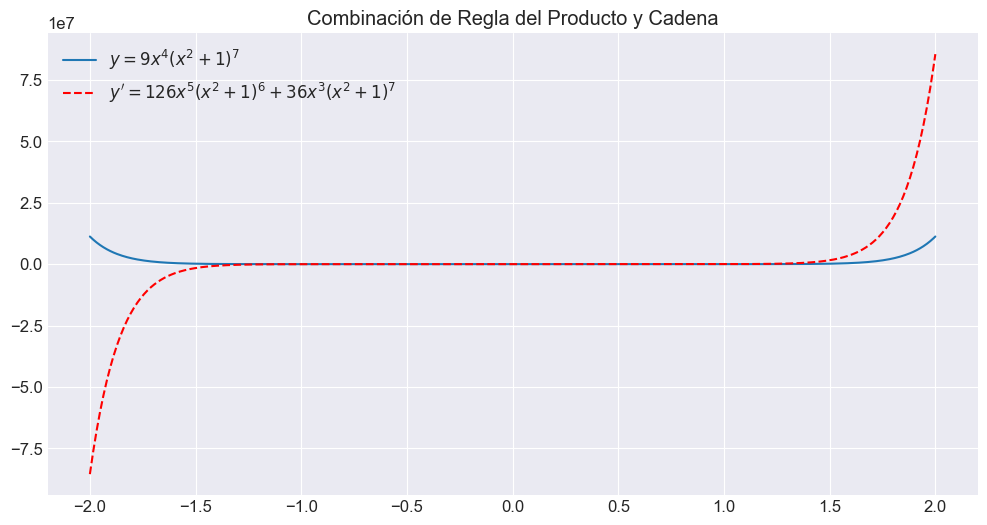

In [12]:
def product_chain_combo():
    x = symbols('x')
    
    # Ejemplo del PDF: y = (x^2 + 1)^7 * (9x^4)
    f = (x**2 + 1)**7
    g = 9*x**4
    
    # Derivadas individuales (usando regla de la cadena para f)
    df = 7*(x**2 + 1)**6 * 2*x
    dg = 36*x**3
    
    # Aplicando regla del producto
    derivative = f*dg + df*g
    
    print("=== Combinación Producto y Cadena ===")
    print(f"Función original: y = {f*g}")
    print(f"Derivada calculada: y' = {derivative}")
    
    # Gráfico comparativo
    x_vals = np.linspace(-2, 2, 500)
    y = f*g
    y_lamb = sp.lambdify(x, y, 'numpy')
    dy_lamb = sp.lambdify(x, derivative, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, y_lamb(x_vals), label=f'$y = {sp.latex(y)}$')
    plt.plot(x_vals, dy_lamb(x_vals), 'r--', label=f"$y' = {sp.latex(derivative)}$")
    plt.title('Combinación de Regla del Producto y Cadena')
    plt.legend()
    plt.grid(True)
    plt.show()

product_chain_combo()

## 5. Combinación con Regla del Cociente

**Caso especial**: Cocientes de funciones compuestas

=== Combinación Cociente y Cadena ===
Función original: y = (6*x**4 - 5)**2/(7*x**2 + 3)**3
Derivada calculada: y' = 6*x*(6*x**4 - 5)*(-42*x**4 + x**2*(56*x**2 + 24) + 35)/(7*x**2 + 3)**4


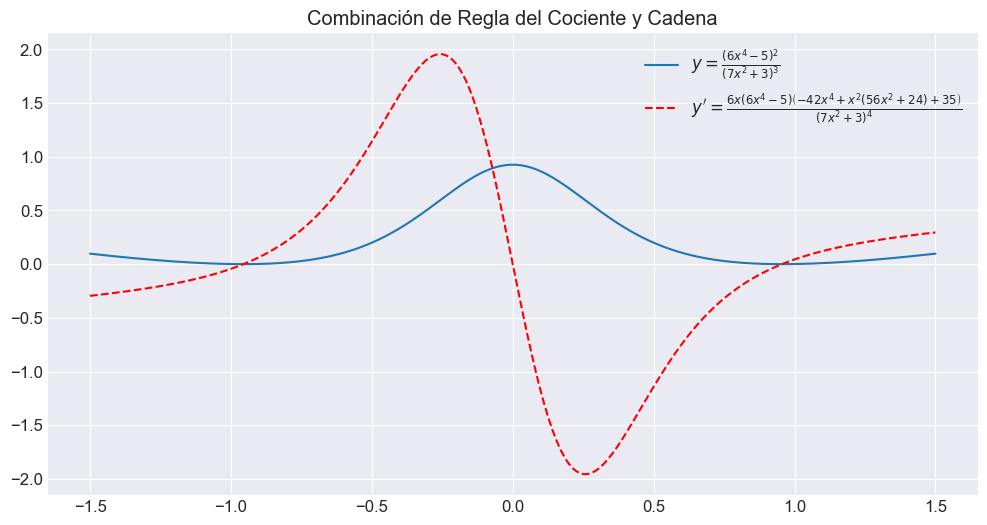

In [13]:
def quotient_chain_combo():
    x = symbols('x')
    
    # Ejemplo del PDF: y = (6x^4 - 5)^2 / (7x^2 + 3)^3
    numerador = (6*x**4 - 5)**2
    denominador = (7*x**2 + 3)**3
    
    # Derivadas (usando regla de la cadena)
    dnum = 2*(6*x**4 - 5)*24*x**3
    dden = 3*(7*x**2 + 3)**2 *14*x
    
    # Aplicando regla del cociente
    derivative = (dnum*denominador - numerador*dden)/(denominador**2)
    
    print("=== Combinación Cociente y Cadena ===")
    print(f"Función original: y = {numerador/denominador}")
    print(f"Derivada calculada: y' = {derivative.simplify()}")
    
    # Gráfico (evitando singularidades)
    x_vals = np.linspace(-1.5, 1.5, 500)
    y = numerador/denominador
    y_lamb = sp.lambdify(x, y, 'numpy')
    dy_lamb = sp.lambdify(x, derivative, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, y_lamb(x_vals), label=f'$y = \\frac{{(6x^4 -5)^2}}{{(7x^2 +3)^3}}$')
    plt.plot(x_vals, dy_lamb(x_vals), 'r--', label=f"$y' = {sp.latex(derivative.simplify())}$")
    plt.title('Combinación de Regla del Cociente y Cadena')
    plt.legend()
    plt.grid(True)
    plt.show()

quotient_chain_combo()

## Resumen Teórico

| **Combinación**          | **Fórmula**                                                                 | **Ejemplo**                                                                 |
|--------------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| Cadena básica            | $\frac{d}{dx}g(f(x)) = g'(f(x)) \cdot f'(x)$                               | $(3x^2+1)^5 \rightarrow 5(3x^2+1)^4 \cdot 6x$                              |
| Cadena + Trigonométricas | $\frac{d}{dx}\sin(u) = \cos(u) \cdot u'$                                   | $\sin(2x) \rightarrow 2\cos(2x)$                                           |
| Cadena + Exponenciales   | $\frac{d}{dx}e^u = e^u \cdot u'$                                           | $e^{x^2} \rightarrow 2xe^{x^2}$                                            |
| Cadena + Logarítmicas    | $\frac{d}{dx}\ln(u) = \frac{u'}{u}$                                        | $\ln(3x) \rightarrow \frac{3}{3x} = \frac{1}{x}$                           |
| Cadena + Producto        | $(f \cdot g)' = f' \cdot g + f \cdot g'$ (aplicando cadena a f' y/o g')    | $(x^2+1)^3 \cdot \sin(x) \rightarrow 3(x^2+1)^2 \cdot 2x \cdot \sin(x) + (x^2+1)^3 \cdot \cos(x)$ |
| Cadena + Cociente        | $\left(\frac{f}{g}\right)' = \frac{f'g - fg'}{g^2}$ (aplicando cadena)     | $\frac{e^x}{x^2+1} \rightarrow \frac{e^x(x^2+1) - e^x(2x)}{(x^2+1)^2}$     |
